# COGS 108 - EDA Checkpoint

# Names

- Xingyu Chen
- Rosie Peng
- Zhekai Wang
- Yuchen Guo
- Zeyu Liu

<a id='research_question'></a>
# Research Question

How does people’s health consciousness affect the healthy degree of their weight in the U.S. in 2017? 

- Health consciousness is defined as the degree to which people value their health. In this context, one's subjective behaviors to make them healthy are considered more health-conscious (for example, having health insurance and doing exercise regularly). Conversely, actions that are detrimental to health imply a lack of health consciousness (for example, smoking or drinking).The way we quantize will be discussed below. 

- The healthy degree of one's weight is defined based on the standard BMI scale, and it indicates how healthy one’s weight is. For the BMI standard, the healthy range is [18.5, 25). With a BMI out of this range, one is considered to be underweight or overweight, which is less healthy. If one’s BMI is larger than 30, we will consider one obese, which is morbid and should be treated as a disease. We will talk more about how we use BMI to measure this variable in the following parts.  

### Hypothesis

Having more health awareness causes an increase in people’s health of weight (concepts defined above).

- We have this expectation because keeping healty body weight is an important part of personal health, and it seems that people who maintain health intentionally usually have healthier body weight. We want to test if there's a cause-and-effect relationship. 


**(We lost points in the research question part and hypothesis part in proposal, and we addressed the feedback here.)**

# Dataset(s)

**(We lost points in the data part in proposal. Addressed the feedback here.)**

- Dataset Name: HARMONIZED DATA FROM U.S. NATIONAL HEALTH SURVEYS
- Link to the dataset: https://nhis.ipums.org/nhis/ (This is the link to database and we create the data extract by ourselves)
- Number of observations: 7,8132

This dataset contains harmonized data from an individual-level survey by IPUMS collecting information on the health of the U.S. population, including the demographics of persons, health behaviors information, and health insurance data. It is structured in a time series way, but for the completeness of variables we need, we choose the sample of 2017. Each observation in the dataset is an individual. 



### Variable List
We have 27 variables in the dataset.

| Variable Name | Description | Type | Values Code |
|---|---|---|---|
| YEAR | year | Numerical | 2017 only |
| REGION |region in U.S. of residence|Categorical|1=Northeast, 2=North Central/Midwest, 03=South, 04=West|
|NHISPID|NHIS unique identifier for person|Numerical|Unique 14-digit value for each individual|
|SAMPWEIGHT|sample person weight|Numerical|inverse probability of selection into the interview; used as weight variable|
|AGE|age|Numerical|0-85; age 85+ are recorded as 85|
|SEX|sex|Categorical|1=Male, 2=Female|
|BMI|body mass index|Numerical|0=Missing, 99.99=Unknown; calculated for age 18+ |
|BMICAT|body mass index, categorical|Categorical|1=underweight, 2=normal, 3=overweight, 4=obese, 9=unknown|
|HINOTCOVE|whether the person lacks health insurance coverage|Categorical|1=has coverage, 2=no coverage, 9=don't know|
|HINONE|whether the person didn't currently have any health insurance coverage|Categorical|1=has some type of insurance, 2=has not, 7=refuse to answer, 9=don't know|
|HIP1COST|amount spent for insurance premiums|Numerical|0=not apply to this question, 99997=refused, 99998=not certain, 99999=don't know|
|ALC5UPYR|total number of days during the past 12 months where one had 5 or more alcoholic drinks|Numerical|990+ =missing for reasons|
|ALCAMT|average number of alcoholic beverages consumed by one on days that they drink|Numerical|96+ =missing; 0=not apply|
|CIGDAYMO|number days smoked in past 30 days|Numerical|90+ =missing|
|SMOKFREQNOW|smoke every day, some days, or not at all now|Categorical|0=not apply, 1=Not at all, 2=some days, 3=everyday, 5+ =missing|
|SMKLSFREQNOW|frequency of smokeless tobacco use now(chewing tobacco, snuff, dip, etc.)|Categorical|0=never use/not apply, 1=everyday, 2=some days, 4=not at all now|
|QUITNO|time since quit smoking: number of units|Numerical|should use with unit types variable; 0=not apply, 900+ =missing; 95+ recorded as 95|
|QUITTP|time since quit smoking: time period unit|Categorical|1=days, 2=weeks, 3=months, 4=years, 0=not apply, 6+ =missing|
|MOD10FWK|frequency of moderate leisure-time physical activity 10+ minutes: times per week|Numerical|0=not apply, 94=less than once per week, 95=never, 96=unable to do, 97+ =missing|
|VIG10FWK|Frequency of vigorous leisure-time physical activity 10+ minutes: times per week|Numerical|Same with MOD10FWK above|
|STRONGFWK|frequency of leisure-time strengthening activity: times per week|Numerical|Same above|
|DIETDYR|ever told by health professional to reduce fat or calories in diet, past year|Categorical|0=not apply, 1=No, 2=Yes, 5+ =missing|
|WTPROGDYR|ever told by health professional to participate in weight loss program, past year|Categorical|Same as above|
|DIETNOW|currently reducing the amount of fat or calories in diet|Categorical|Same as above|
|WTPROGNOW|currently participating in a weight loss program|Categorical|Same as above|
|HRSLEEP|usual hours sleep per day|Numerical|0=not apply, 30+ =missing|
|PCLOOKHELYR|looked up health information on Internet, past year|Categorical|1=No, 2=Yes, 0=not apply. 5+ =missing|


- _"not apply to this question"_ indicates that the individual's missingness in the variable is due to their situation. For example, someone who reports they never drinks will not have number of alcohol consumed, so they do not need to answer this question in the survey, and the corresponding variable ALCAMT will be recorded as 0. Also, most questions are only surveyed on sampled adults (age 18+), and individuals who are not sampled or not age 18+ can have this value. 
- _"missing for reasons"/"missing"_ indicates that the value is missing due to: individual refuses to answer/individual is uncertain about this question/individual doesn't know.
- Variables that are included in the dataset but would not be used in the analysis are not in this form as they are not related to this project or repeated with other variables. They will be cleaned out in the following part. Descriptions of these variables could be found on website of the database. Variable name list to be cleaned: PX, PERWEIGHT, ASTATFLG, CSTATFLG, MCAIDPREM, QUITYRS

# Setup

In [54]:
import pandas as pd
import numpy as np
import requests

import seaborn as sns
sns.set(font_scale=2, style="whitegrid")
import matplotlib.pyplot as plt

In [2]:
# Read the csv file
df = pd.read_csv("nhis_2017.csv")
df.head(10)

,YEAR,REGION,NHISPID,PX,PERWEIGHT,SAMPWEIGHT,ASTATFLG,CSTATFLG,AGE,SEX,...,QUITYRS,MOD10FWK,VIG10FWK,STRONGFWK,DIETDYR,WTPROGDYR,DIETNOW,WTPROGNOW,HRSLEEP,PCLOOKHELYR
0,2017,3,20170000030101,1,4000,5044.0,1,0,65,2,...,96,95,7,95,1,1,2,1,8,2
1,2017,3,20170000080101,1,6112,0.0,2,0,27,2,...,96,0,0,0,0,0,0,0,0,0
2,2017,3,20170000080102,2,3778,4808.0,0,1,10,1,...,96,0,0,0,0,0,0,0,0,0
3,2017,2,20170000090101,1,3143,3770.0,1,0,19,1,...,96,98,3,3,2,1,2,1,6,2
4,2017,2,20170000110101,1,4766,0.0,3,0,43,2,...,96,0,0,0,0,0,0,0,0,0
5,2017,2,20170000110102,2,4514,17305.0,1,0,45,1,...,96,2,94,2,2,1,2,1,5,1
6,2017,2,20170000110103,3,5298,0.0,3,0,20,2,...,96,0,0,0,0,0,0,0,0,0
7,2017,2,20170000110104,4,4070,4027.0,0,1,13,1,...,96,0,0,0,0,0,0,0,0,0
8,2017,2,20170000150101,1,4960,7383.0,1,0,67,2,...,5,7,3,3,1,1,2,1,8,2
9,2017,3,20170000180101,1,3868,8314.0,1,0,40,1,...,96,3,95,95,1,1,1,1,8,1


# Data Cleaning

- This dataset uses certain values to represent missingness, so we cannot simply use dropna() in pandas. Instead, we exclude certain values.

In [3]:
## dropping useless variables
data = df.copy()
data = data.drop(columns=["YEAR", "PX", "PERWEIGHT", "ASTATFLG", "CSTATFLG", 
                          "MCAIDPREM", "QUITYRS", "ALCAMT"])
year = 2017

In [4]:
## set NaN values according to value codes
# BMI
data.loc[(data['BMI'] == 0) | (data['BMI'] >= 99),'BMI'] = np.nan

# lacks coverage
data.loc[data['HINOTCOVE'] == 9, 'HINOTCOVE'] = np.nan

# no insurance
data.loc[data['HINONE'] >= 7, 'HINONE'] = np.nan

# insurance cost
data.loc[(data['HIP1COST'] >= 99990), 'HIP1COST'] = np.nan

# number of drinking days
data.loc[data['ALC5UPYR'] > 365, 'ALC5UPYR'] = np.nan

# cigarette per day
data.loc[data['CIGDAYMO'] >= 90, "CIGDAYMO"] = np.nan

# quit smoking number and units
data.loc[data['QUITNO'] >= 900, 'QUITNO'] = np.nan
data.loc[data['QUITTP'] >= 6, 'QUITTP'] = np.nan

# smoke frequency
data.loc[data['SMOKFREQNOW'] >= 5, 'SMOKFREQNOW'] = np.nan

# physical activities variables
def clean_physical_activities(val):
    if val >= 97:
        return np.nan
    elif val >= 94:
        return 0
    else:
        return val
    
data['MOD10FWK'] = data['MOD10FWK'].apply(clean_physical_activities)
data['VIG10FWK'] = data['VIG10FWK'].apply(clean_physical_activities)
data['STRONGFWK'] = data['STRONGFWK'].apply(clean_physical_activities)

# loss weight related variables
def clean_weight_loss(val):
    if val == 0 or val >= 5:
        return np.nan
    else:
        return val
    
data['DIETDYR'] = data['DIETDYR'].apply(clean_weight_loss)
data['WTPROGDYR'] = data['WTPROGDYR'].apply(clean_weight_loss)
data['DIETNOW'] = data['DIETNOW'].apply(clean_weight_loss)
data['WTPROGNOW'] = data['WTPROGNOW'].apply(clean_weight_loss)

# search health info online
data['PCLOOKHELYR'] = data['PCLOOKHELYR'].apply(clean_weight_loss)

# sleep time per day
data.loc[(data['HRSLEEP'] > 24) | (data['HRSLEEP'] == 0), 'HRSLEEP'] = np.nan

data.head()

,REGION,NHISPID,SAMPWEIGHT,AGE,SEX,BMI,BMICAT,HINOTCOVE,HINONE,HIP1COST,...,QUITTP,MOD10FWK,VIG10FWK,STRONGFWK,DIETDYR,WTPROGDYR,DIETNOW,WTPROGNOW,HRSLEEP,PCLOOKHELYR
0,3,20170000030101,5044.0,65,2,29.30,3,1.0,1.0,3000.0,...,0.0,0.0,7.0,0.0,1.0,1.0,2.0,1.0,8.0,2.0
1,3,20170000080101,0.0,27,2,NaN,9,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20170000080102,4808.0,10,1,NaN,9,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2,20170000090101,3770.0,19,1,23.09,2,1.0,1.0,0.0,...,0.0,NaN,3.0,3.0,2.0,1.0,2.0,1.0,6.0,2.0
4,2,20170000110101,0.0,43,2,NaN,9,1.0,1.0,2080.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# BMI is a core variable in this study. Drop the observations without this value. 
data_cl = data.dropna(subset=['BMI'])
data_cl.isna().sum()

REGION              0
NHISPID             0
SAMPWEIGHT          0
AGE                 0
SEX                 0
BMI                 0
BMICAT              0
HINOTCOVE          80
HINONE             85
HIP1COST         2873
ALC5UPYR         8840
CIGDAYMO        24923
SMOKFREQNOW         1
SMKLSFREQNOW        0
QUITNO             44
QUITTP             44
MOD10FWK          420
VIG10FWK          213
STRONGFWK         124
DIETDYR            23
WTPROGDYR          17
DIETNOW            18
WTPROGNOW           7
HRSLEEP           620
PCLOOKHELYR       183
dtype: int64

In [6]:
# For other variables needed to build health consciousness index, 
# drop if more than half missing values in a column.
data_cl = data_cl.dropna(axis=1, thresh=data_cl.shape[0] / 2)
data_cl = data_cl.dropna()

In [7]:
data_cl

,REGION,NHISPID,SAMPWEIGHT,AGE,SEX,BMI,BMICAT,HINOTCOVE,HINONE,HIP1COST,...,QUITTP,MOD10FWK,VIG10FWK,STRONGFWK,DIETDYR,WTPROGDYR,DIETNOW,WTPROGNOW,HRSLEEP,PCLOOKHELYR
0,3,20170000030101,5044.0,65,2,29.30,3,1.0,1.0,3000.0,...,0.0,0.0,7.0,0.0,1.0,1.0,2.0,1.0,8.0,2.0
5,2,20170000110102,17305.0,45,1,35.44,4,1.0,1.0,2080.0,...,0.0,2.0,0.0,2.0,2.0,1.0,2.0,1.0,5.0,1.0
8,2,20170000150101,7383.0,67,2,43.13,4,1.0,1.0,1482.0,...,4.0,7.0,3.0,3.0,1.0,1.0,2.0,1.0,8.0,2.0
9,3,20170000180101,8314.0,40,1,32.27,4,1.0,1.0,4740.0,...,0.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,8.0,1.0
17,2,20170000200101,4551.0,79,2,24.67,2,1.0,1.0,0.0,...,0.0,7.0,7.0,0.0,1.0,1.0,2.0,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78113,1,20170588690101,4341.0,78,2,19.84,2,1.0,1.0,696.0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0
78121,4,20170588800102,6082.0,80,2,20.51,2,1.0,1.0,2736.0,...,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,8.0,2.0
78122,3,20170588810101,5557.0,70,2,36.01,4,1.0,1.0,105.0,...,4.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,8.0,2.0
78123,3,20170588820101,7603.0,66,2,37.75,4,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,7.0,1.0


After cleaning, we have 14355 observations and 24 variables in the dataset now. CIGDAYMO is droped due to too much missingness. Now we have a dataset without missingness!

In [8]:
data_cl.isna().sum()

REGION          0
NHISPID         0
SAMPWEIGHT      0
AGE             0
SEX             0
BMI             0
BMICAT          0
HINOTCOVE       0
HINONE          0
HIP1COST        0
ALC5UPYR        0
SMOKFREQNOW     0
SMKLSFREQNOW    0
QUITNO          0
QUITTP          0
MOD10FWK        0
VIG10FWK        0
STRONGFWK       0
DIETDYR         0
WTPROGDYR       0
DIETNOW         0
WTPROGNOW       0
HRSLEEP         0
PCLOOKHELYR     0
dtype: int64

### Construct Variables

- **health consciousness index**: First, we categorizing the health-related variables to conscious/unconscious, depending on their effects on one's health are positive or negative. Then we sum them up to get the health consciousness index. Higher its value is, more health consciousness the individual is considered to have. 
- **healthy degree of weight**: In a categorical way, we build it by reassigning values to the categorical BMI: 1=healthy, 0=not healthy, -1=morbid. In the numerical way, we use the BMI variable and set the center of healthy range (21.75) to have a "healthy score" of 50. So this score will be 50 - (absolute distance to 21.75). 

In [9]:
df_hci = data_cl.drop(columns=['REGION', 'NHISPID', 'SAMPWEIGHT','AGE','SEX','BMI','BMICAT'])

In [10]:
df_hci.describe()

,HINOTCOVE,HINONE,HIP1COST,ALC5UPYR,SMOKFREQNOW,SMKLSFREQNOW,QUITNO,QUITTP,MOD10FWK,VIG10FWK,STRONGFWK,DIETDYR,WTPROGDYR,DIETNOW,WTPROGNOW,HRSLEEP,PCLOOKHELYR
count,14355.000000,14355.000000,14355.000000,14355.000000,14355.00000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000
mean,1.096343,1.090352,1947.502334,11.575200,0.73187,0.437827,5.464855,1.061372,3.390317,2.127482,1.333612,1.259143,1.079415,1.500244,1.077255,7.014908,1.604389
std,0.295071,0.286695,3211.657556,42.152502,1.01689,1.212863,11.937465,1.747686,3.983630,3.449699,2.666516,0.438180,0.270395,0.500017,0.267005,1.297762,0.488999
min,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000
50%,1.000000,1.000000,252.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,2.000000
75%,1.000000,1.000000,2808.000000,3.000000,1.00000,0.000000,2.000000,4.000000,6.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,8.000000,2.000000
max,2.000000,2.000000,20000.000000,365.000000,3.00000,4.000000,95.000000,4.000000,28.000000,28.000000,28.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000


In [11]:
# First, normalize some numerical variables which are too big.
# Divide them by the mean.
df_hci['HIP1COST'] = df_hci['HIP1COST'] / df_hci['HIP1COST'].mean()
df_hci['ALC5UPYR'] = df_hci['ALC5UPYR'] / df_hci['ALC5UPYR'].mean()
df_hci['MOD10FWK'] = df_hci['MOD10FWK'] / df_hci['MOD10FWK'].mean()
df_hci['VIG10FWK'] = df_hci['VIG10FWK'] / df_hci['VIG10FWK'].mean()
df_hci['STRONGFWK'] = df_hci['STRONGFWK'] / df_hci['STRONGFWK'].mean()


Construct variable for days of quit smoking.

In [12]:
def quit_smk(time, unit):
#     2=week, 3=month, 4=year
    unit = unit.replace({2:7, 3:30, 4:365})
    out = time * unit
    return out

data['quit_smoke_days'] = quit_smk(data['QUITNO'], data['QUITTP'])
df_hci['quit_smk_days'] = data['quit_smoke_days'] / data['quit_smoke_days'].mean()
df_hci = df_hci.drop(columns=['QUITNO', 'QUITTP'])

For sleep hours, we set 7 hours as the most healthy (value = 1).

In [13]:
sleep = df_hci['HRSLEEP'] / df_hci['HRSLEEP'].mean()
sleep = 1 - abs(sleep - 1)
df_hci = df_hci.drop(columns=['HRSLEEP'])
df_hci['sleep_health'] = sleep

The we can calculate the HCI by adding things up. 

In [14]:
df_hci.columns

Index(['HINOTCOVE', 'HINONE', 'HIP1COST', 'ALC5UPYR', 'SMOKFREQNOW',
       'SMKLSFREQNOW', 'MOD10FWK', 'VIG10FWK', 'STRONGFWK', 'DIETDYR',
       'WTPROGDYR', 'DIETNOW', 'WTPROGNOW', 'PCLOOKHELYR', 'quit_smk_days',
       'sleep_health'],
      dtype='object')

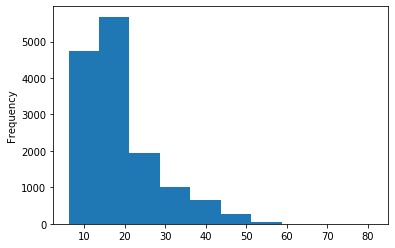

In [15]:
def HCI(df):
    """
    input: a dataframe with all variables needed
    output: a series of HCI (health consciousness index)
    """
    out = df.sum(axis=1)
    return out

data_cl['HCI'] = HCI(df_hci)
data_cl['HCI'].plot(kind='hist')

Then it's time to defind the healthy degree of weight using method mentioned above.

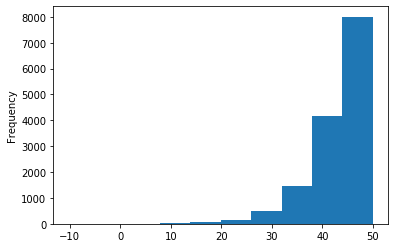

In [16]:
# numerical way
data_cl['weight_healthy_deg'] = 50 - abs(21.75 - data['BMI'])
data_cl['weight_healthy_deg'].plot(kind='hist')

In [17]:
# categorical way
# 1=underweight, 2=normal, 3=overweight, 4=obese for BMICAT
dct = {1:0, 3:0, 2:1, 4:-1}
data_cl['weight_healthy_deg_cate'] = data_cl['BMICAT'].replace(dct)
data_cl['weight_healthy_deg_cate'].value_counts()

 0    5221
 1    4722
-1    4412
Name: weight_healthy_deg_cate, dtype: int64

In [18]:
data_cl

,REGION,NHISPID,SAMPWEIGHT,AGE,SEX,BMI,BMICAT,HINOTCOVE,HINONE,HIP1COST,...,STRONGFWK,DIETDYR,WTPROGDYR,DIETNOW,WTPROGNOW,HRSLEEP,PCLOOKHELYR,HCI,weight_healthy_deg,weight_healthy_deg_cate
0,3,20170000030101,5044.0,65,2,29.30,3,1.0,1.0,3000.0,...,0.0,1.0,1.0,2.0,1.0,8.0,2.0,17.690281,42.45,0
5,2,20170000110102,17305.0,45,1,35.44,4,1.0,1.0,2080.0,...,2.0,2.0,1.0,2.0,1.0,5.0,1.0,18.870404,36.31,-1
8,2,20170000150101,7383.0,67,2,43.13,4,1.0,1.0,1482.0,...,3.0,1.0,1.0,2.0,1.0,8.0,2.0,20.283806,28.62,-1
9,3,20170000180101,8314.0,40,1,32.27,4,1.0,1.0,4740.0,...,0.0,1.0,1.0,1.0,1.0,8.0,1.0,13.178331,39.48,-1
17,2,20170000200101,4551.0,79,2,24.67,2,1.0,1.0,0.0,...,0.0,1.0,1.0,2.0,1.0,7.0,1.0,14.352854,47.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78113,1,20170588690101,4341.0,78,2,19.84,2,1.0,1.0,696.0,...,0.0,1.0,1.0,1.0,1.0,7.0,1.0,8.945171,48.09,1
78121,4,20170588800102,6082.0,80,2,20.51,2,1.0,1.0,2736.0,...,0.0,1.0,1.0,2.0,1.0,8.0,2.0,12.444279,48.76,1
78122,3,20170588810101,5557.0,70,2,36.01,4,1.0,1.0,105.0,...,0.0,2.0,1.0,2.0,1.0,8.0,2.0,22.963597,35.74,-1
78123,3,20170588820101,7603.0,66,2,37.75,4,1.0,1.0,0.0,...,0.0,2.0,1.0,2.0,1.0,7.0,1.0,9.997875,34.00,-1


- Also, we want to rename the variables for convinience and readability.

In [19]:
## renaming the columns for readability
data_cl = data_cl.rename(columns = {"REGION":"region","NHISPID":"PID","SAMPWEIGHT":"sample_weight","AGE":'age','SEX':'sex',
                                    "BMICAT":"BMI_cate","HINOTCOVE":"lack_HI_cover","HINONE":"no_HI",
                                    "HIP1COST":"fee_HI","ALC5UPYR":"drinks_more_than_5",
                                    "SMOKFREQNOW":"smoke_freq", "SMKLSFREQNOW":"tobacco_freq","QUITNO":"quit_smoke_time",
                                    "QUITTP":"unit_quit_smoke_time","MOD10FWK":"moderate_physc_act",
                                    "VIG10FWK":"vigorous_physc_act","STRONGFWK":"strengthen_act",
                                    "DIETDYR":"told_diet","WTPROGDYR":"told_weight_loss",
                                    "DIETNOW":"now_diet","WTPROGNOW":"now_weight_loss","HRSLEEP":"hours_sleep",
                                    "PCLOOKHELYR":"search_health_info_online"})
data_cl

# Data Analysis & Results

,region,PID,sample_weight,age,sex,BMI,BMI_cate,lack_HI_cover,no_HI,fee_HI,...,strengthen_act,told_diet,told_weight_loss,now_diet,now_weight_loss,hours_sleep,search_health_info_online,HCI,weight_healthy_deg,weight_healthy_deg_cate
0,3,20170000030101,5044.0,65,2,29.30,3,1.0,1.0,3000.0,...,0.0,1.0,1.0,2.0,1.0,8.0,2.0,17.690281,42.45,0
5,2,20170000110102,17305.0,45,1,35.44,4,1.0,1.0,2080.0,...,2.0,2.0,1.0,2.0,1.0,5.0,1.0,18.870404,36.31,-1
8,2,20170000150101,7383.0,67,2,43.13,4,1.0,1.0,1482.0,...,3.0,1.0,1.0,2.0,1.0,8.0,2.0,20.283806,28.62,-1
9,3,20170000180101,8314.0,40,1,32.27,4,1.0,1.0,4740.0,...,0.0,1.0,1.0,1.0,1.0,8.0,1.0,13.178331,39.48,-1
17,2,20170000200101,4551.0,79,2,24.67,2,1.0,1.0,0.0,...,0.0,1.0,1.0,2.0,1.0,7.0,1.0,14.352854,47.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78113,1,20170588690101,4341.0,78,2,19.84,2,1.0,1.0,696.0,...,0.0,1.0,1.0,1.0,1.0,7.0,1.0,8.945171,48.09,1
78121,4,20170588800102,6082.0,80,2,20.51,2,1.0,1.0,2736.0,...,0.0,1.0,1.0,2.0,1.0,8.0,2.0,12.444279,48.76,1
78122,3,20170588810101,5557.0,70,2,36.01,4,1.0,1.0,105.0,...,0.0,2.0,1.0,2.0,1.0,8.0,2.0,22.963597,35.74,-1
78123,3,20170588820101,7603.0,66,2,37.75,4,1.0,1.0,0.0,...,0.0,2.0,1.0,2.0,1.0,7.0,1.0,9.997875,34.00,-1


Carry out EDA on your dataset(s); Describe in this section

### EDA and Descriptive statistics

In [76]:
data_cl[["age","HCI","sample_weight","BMI","BMI_cate"]].describe()

,age,HCI,sample_weight,BMI,BMI_cate
count,14355.000000,14355.000000,14355.000000,14355.000000,14355.000000
mean,49.541623,18.861821,9101.639429,28.080697,2.952072
std,17.614503,8.999115,6914.529123,6.273890,0.828679
min,18.000000,6.148929,717.000000,13.980000,1.000000
25%,34.000000,12.618845,4587.000000,23.740000,2.000000
50%,49.000000,16.067086,7430.000000,26.950000,3.000000
75%,64.000000,22.110765,11275.000000,31.170000,4.000000
max,85.000000,81.200124,80314.000000,81.980000,4.000000


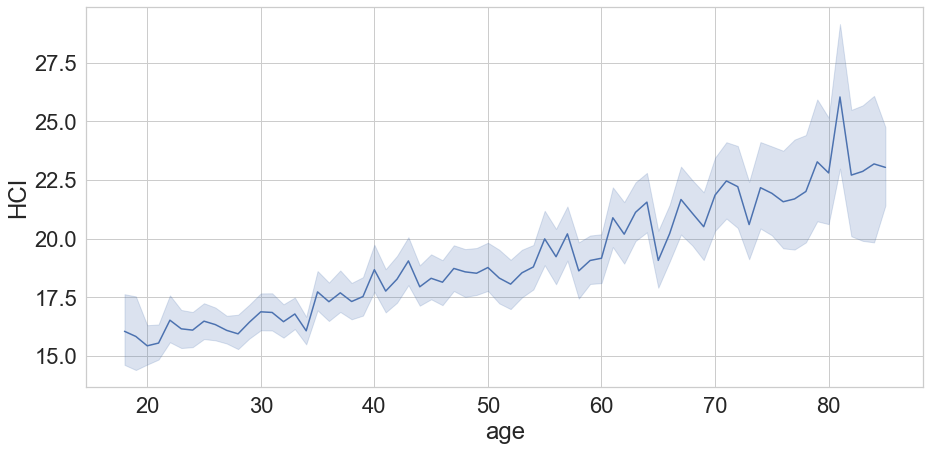

In [71]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = "age", y= "HCI", data = data_cl)

The plot shows that a positive trend between ages and HCI

In [56]:
unique = data_cl["sex"].unique()
palette = dict(zip(unique, sns.color_palette(["#ff0000","#0000CD"])))

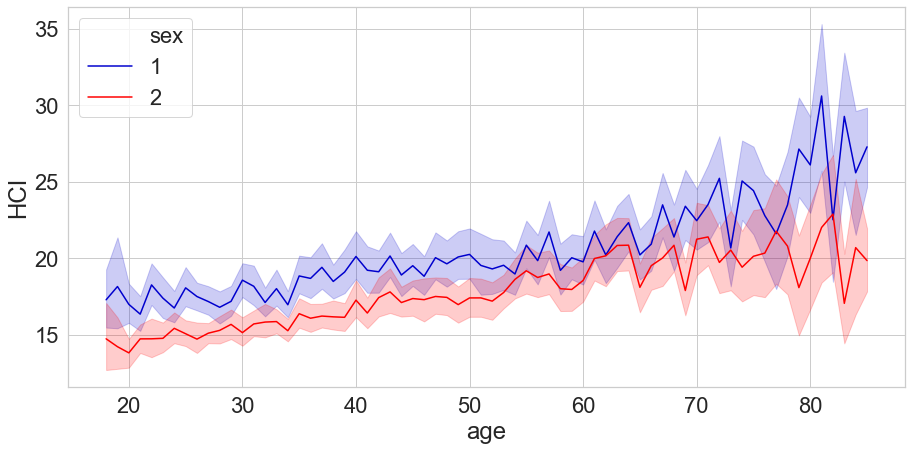

In [70]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = "age", y= "HCI", hue = "sex", palette = palette, data = data_cl)

The plot shows that males have higher HCI than females across all age.

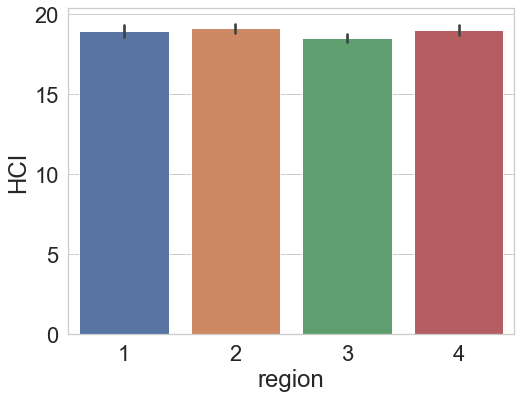

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(x = "region", y= "HCI", data = data_cl)

All four regions in the U.S. have approximately equal average of HCI

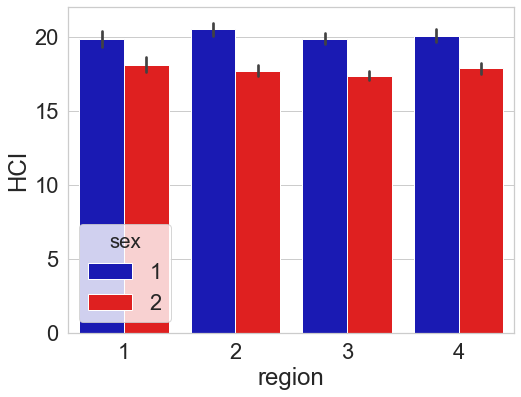

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(x = "region", y= "HCI",hue = "sex", palette = palette, data = data_cl)

The plot shows that males have higher HCI than females across all four regions in the U.S.

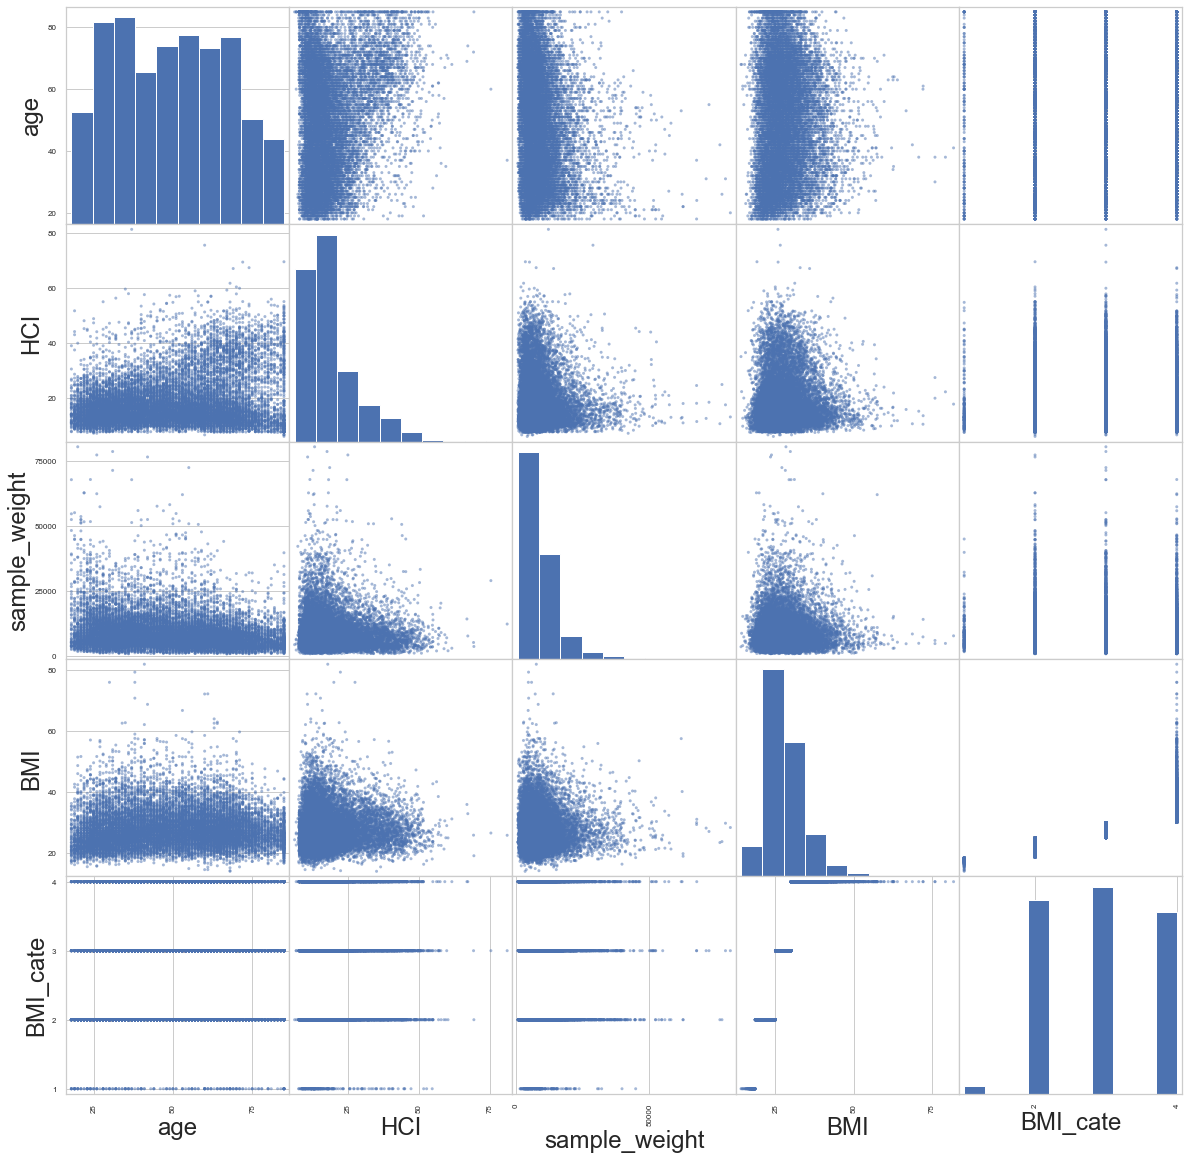

In [79]:
fig = pd.plotting.scatter_matrix(data_cl[["age","HCI","sample_weight","BMI","BMI_cate"]], figsize = (20, 20))

<a id='updated ethics'></a>
# Updated Ethics and Privacy

**(We lost points in ethics part in proposal. Addressed feedback here. )**

- Data: The data we use is available to everyone. We collect data from NHIS website https://nhis.ipums.org/nhis/, which is free for everyone to use. Our data contains 26742 individuals, which is enough for us to make reliable inferences. There is no sensitive or personally indentifiable information in the data that would cause any privacy concerns

- Informed consent: We collect data from The National Health Interview Survey website, and we believe the data on this website is free for us to use.On the website, it claims that all participants are randomly selected using a scientific method and they could choose whether they want to participate or not. 

- Privacy: Data anonymization and protection of individual privacy are priorities for our project. According to NCHS, all survey responses are immediately encrypted, with  data stored entirely on secure servers that cannot be accessed through the Internet. The data we gathered or used in the analysis is anonymous. The data we collected does not contain any names, addresses or any other personality identifying information. We just use NHISPID, the NHIS unique identifier to distinguish individuals.

- Fairness and objectivity: There is no bias or discrimination in our data. We just collect all data from year 2017, without choosing certain groups or individuals intentionally. And the data source NHIS collects information on the health, health care access, and health behaviors of the civilian, non-institutionalized U.S. population, which does not contain any biases. And in our future analysis, we will not group individuals using any standards like sex, ethinicity or race that may cause biases.

- Potential biases related to topic: Our topic, the relationship between health consciousness and healthy degree of weight may be a sensitive problem because many people with obsesity are discriminated today. But we will only analyze how health consciousness affect weight, not display any emotions and attitudes towards weight of individuals.

- Transparency: Our model is not a black box. We will show every step of our analysis to make our decisions and results interpretable.


